In [1]:
import pandas
data = pandas.read_csv(
    '/Users/xiefei/Documents/Workspace/CnLearnPython/PDABook/第六章/6.2 散点图/散点图.csv',
    engine = 'python', encoding = 'utf8'
)
data

,日期,购买用户数,广告费用,促销,渠道数
0,2014/1/1,2496,9.14,否,6
1,2014/1/2,2513,9.47,否,8
2,2014/1/3,2228,6.31,是,4
3,2014/1/4,2336,6.41,否,2
4,2014/1/5,2508,9.05,是,5
...,...,...,...,...,...
153,2014/6/26,2492,8.72,是,2
154,2014/6/27,2712,10.80,否,5
155,2014/6/28,2369,7.35,否,5
156,2014/6/29,2380,7.19,是,4


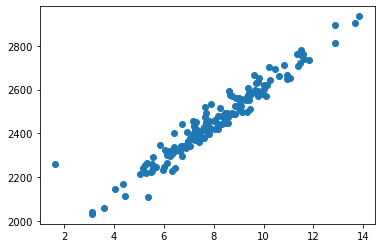

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(data['广告费用'], data['购买用户数'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


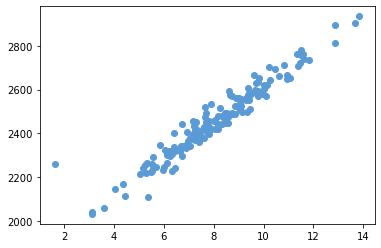

In [8]:
mainColor = (91/ 255, 155/255, 213/ 255, 1)
plt.scatter(
    data['广告费用'], 
    data['购买用户数'],
    c = mainColor
)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


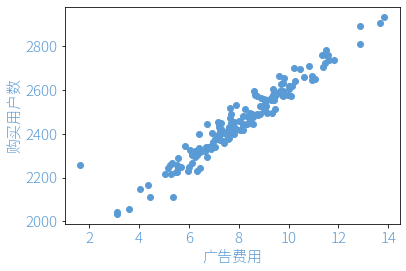

In [11]:
font = matplotlib.font_manager.FontProperties(
    fname = '/Users/xiefei/Documents/Workspace/CnLearnPython/PDABook/SourceHanSansCN-Light.otf',
    size = 15
)

plt.xlabel(
    '广告费用', 
    color = mainColor,
    fontproperties = font
)
plt.ylabel(
    '购买用户数', 
    color = mainColor,
    fontproperties = font
)
# 设置坐标轴的刻度样式
plt.xticks(
    color = mainColor,
    fontproperties = font
)
plt.yticks(
    color = mainColor,
    fontproperties = font
)
plt.scatter(
    data['广告费用'], 
    data['购买用户数'],
    c = mainColor
)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


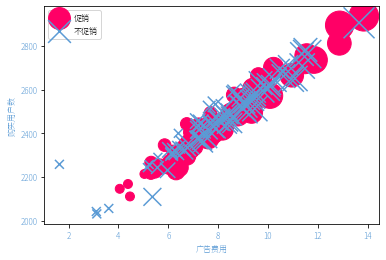

In [17]:
plt.figure()
# 粉色做为促销点的颜色
pinkColor = (255/255, 0/255, 102/255, 1)
# 蓝色作为不促销点的颜色
blueColor = (91/255, 155/255, 213/255, 1)

plt.scatter(
    data[data['促销'] == '是']['广告费用'],
    data[data['促销'] == '是']['购买用户数'],
    c = pinkColor,
    marker = 'o',
    s = data[data['促销'] == '是']['渠道数']*80
)

plt.scatter(
    data[data['促销'] == '否']['广告费用'],
    data[data['促销'] == '否']['购买用户数'],
    c = blueColor,
    marker = 'x',
    s = data[data['促销'] == '否']['渠道数']*80
)

plt.xlabel(
    '广告费用', 
    color = mainColor,
    fontproperties = font
)
plt.ylabel(
    '购买用户数', 
    color = mainColor,
    fontproperties = font
)
# 设置坐标轴的刻度样式
plt.xticks(
    color = mainColor,
    fontproperties = font
)
plt.yticks(
    color = mainColor,
    fontproperties = font
)
# 增加图例
legend = plt.legend(labels = ['促销', '不促销'], prop = font)

In [18]:
import pandas
data = pandas.read_csv(
    '/Users/xiefei/Documents/Workspace/CnLearnPython/PDABook/第五章/5.8 矩阵分析/矩阵分析.csv',
    engine = 'python', encoding = 'utf8'
)
costAgg = data.groupby(
    by = '省份', 
    as_index = False
)['月消费（元）'].agg('mean')
dataAgg = data.groupby(
    by = '省份', 
    as_index = False
)['月流量（MB）'].agg('mean')
aggData = costAgg.merge(dataAgg)

In [31]:
labelFont = matplotlib.font_manager.FontProperties(
    fname = '/Users/xiefei/Documents/Workspace/CnLearnPython/PDABook/SourceHanSansCN-Light.otf',
    size = 15
)
mainColor = (91/255, 155/255, 213/255, 1)
fontColor = (110/255, 110/255, 110/255, 1)

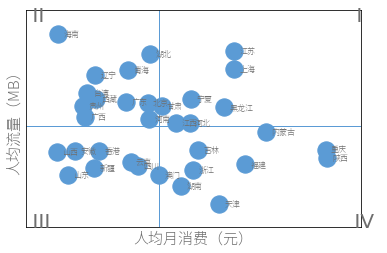

In [32]:
# 新建窗口
fig = plt.figure
# 预留1% 边缘空白
gap = 0.01
# 计算x轴范围
xMin = aggData['月消费（元）'].min()*(1-gap)
xMax = aggData['月消费（元）'].max()*(1+gap)
# 计算y轴范围
yMin = aggData['月流量（MB）'].min()*(1-gap)
yMax = aggData['月流量（MB）'].max()*(1+gap)

# xy 坐标范围
plt.xlim(xMin, xMax)
plt.ylim(yMin, yMax)

plt.xticks([])
plt.yticks([])

plt.scatter(
    aggData['月消费（元）'],
    aggData['月流量（MB）'],
    s = 300,
    marker = 'o',
    color = mainColor
)

# 坐标轴标签
plt.xlabel(
    '人均月消费（元）',
    color = fontColor,
    fontproperties = labelFont
)

plt.ylabel(
    '人均流量（MB）',
    color = fontColor,
    fontproperties = labelFont
)

# 绘制均值线
plt.vlines(
    x = data['月消费（元）'].mean(),
    ymin = yMin,
    ymax = yMax,
    linewidth = 1,
    color = mainColor
)

plt.hlines(
    y = data['月流量（MB）'].mean(),
    xmin = xMin,
    xmax = xMax,
    linewidth = 1,
    color = mainColor
)

#  4个象限标记
plt.text(
    xMax - 0.5,
    yMax - 5,
    ' I ',
    color = fontColor,
    fontsize = 20
)

plt.text(
    xMin,
    yMax - 5,
    ' II ',
    color = fontColor,
    fontsize = 20
)

plt.text(
    xMin,
    yMin,
    ' III ',
    color = fontColor,
    fontsize = 20
)

plt.text(
    xMax - 0.6,
    yMin,
    ' IV ',
    color = fontColor,
    fontsize = 20
)

for i, r in aggData.iterrows():
    plt.text(
        r['月消费（元）'] + 0.25,
        r['月流量（MB）'] -1,
        r['省份'],
        color = fontColor,
        fontproperties = font
    )

In [34]:
import pandas
data = pandas.read_csv(
    '/Users/xiefei/Documents/Workspace/CnLearnPython/PDABook/第六章/6.4 折线图/折线图.csv',
    engine = 'python', encoding = 'utf8'
)
data

,id,reg_date,id_num,gender,birthday
0,109899,2011-02-01,35042519920219007J,男,1992/2/19
1,109903,2011-02-01,43048119891223411D,男,1989/12/23
2,109904,2011-02-01,42010219880201313H,男,1988/2/1
3,109905,2011-02-01,44030619840213001E,男,1984/2/13
4,109906,2011-02-01,43070219870502103H,男,1987/5/2
...,...,...,...,...,...
49945,194092,2011-07-31,51132219871005915I,男,1987/10/5
49946,194093,2011-07-31,37010519860715113F,男,1986/7/15
49947,194094,2011-07-31,35018219851102163C,男,1985/11/2
49948,194096,2011-07-31,41032319880713051E,男,1988/7/13


In [35]:
data['reg_date'] = pandas.to_datetime(
    data['reg_date']
)

In [36]:
ga = data.groupby(
    by = ['reg_date'],
    as_index = False
)['id'].agg('count')
ga.columns = ['注册日期', '注册用户数']

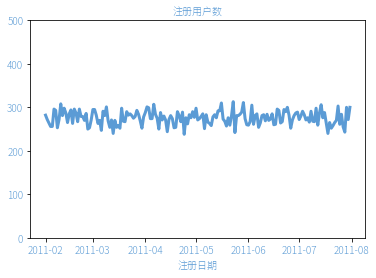

In [44]:
import matplotlib
from matplotlib import pyplot as plt

mainColor = (91/255, 155/255, 213/255, 1)
font = matplotlib.font_manager.FontProperties(
    fname = '/Users/xiefei/Documents/Workspace/CnLearnPython/PDABook/SourceHanSansCN-Light.otf',
    size = 10
)
labelFont = matplotlib.font_manager.FontProperties(
    fname = '/Users/xiefei/Documents/Workspace/CnLearnPython/PDABook/SourceHanSansCN-Light.otf',
    size = 10
)

# y轴的显示范围
plt.ylim(0, 500)
plt.title('注册用户数', color =mainColor, fontproperties = labelFont)
plt.xlabel('注册日期', color =mainColor, fontproperties = labelFont)
plt.title('注册用户数', color =mainColor, fontproperties = labelFont)

# 坐标轴的刻度样式
plt.xticks(color=mainColor, fontproperties = font)
plt.yticks(color=mainColor, fontproperties = font)

# 绘制折线图
plt.plot(ga['注册日期'], ga['注册用户数'], '-', lw = 3, color = mainColor)

In [46]:
import pandas
data = pandas.read_csv(
    '/Users/xiefei/Documents/Workspace/CnLearnPython/PDABook/第五章/5.4 结构分析/结构分析.csv',
    engine = 'python', encoding = 'utf8'
)
ga = data.groupby(
    by = ['gender']
)['id'].agg('count')
ga = ga/ga.sum()
ga

gender
女    0.073028
男    0.926972
Name: id, dtype: float64

([<matplotlib.patches.Wedge at 0x122151b10>,
 [Text(1.0711776165680964, 0.2501569782426474, '女'),
  Text(-1.071177634134134, -0.25015690302448157, '男')],
 [Text(0.5842786999462344, 0.1364492608596258, '7.3%'),
  Text(-0.5842787095277093, -0.13644921983153538, '92.7%')])

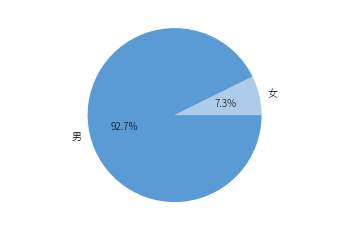

In [47]:
import matplotlib
from matplotlib import pyplot as plt

femaleColor = (91/255, 155/255, 213/255, 0.5)
mainColor = (91/255, 155/255, 213/255, 1)
font = matplotlib.font_manager.FontProperties(
    fname = '/Users/xiefei/Documents/Workspace/CnLearnPython/PDABook/SourceHanSansCN-Light.otf',
    size = 10
)

# 等长饼图
plt.axis('equal')
plt.pie(
    ga,
    labels = ['女', '男'],
    colors = [femaleColor, mainColor],
    autopct = '%.1f%%',
    textprops = {'fontproperties': font}
)

In [49]:
import pandas
data = pandas.read_csv(
    '/Users/xiefei/Documents/Workspace/CnLearnPython/PDABook/第六章/6.6 柱形图/柱形图.csv',
    engine = 'python', encoding = 'utf8'
)
data

,号码,省份,手机品牌,通信品牌,手机操作系统,月消费（元）,月流量（MB）
0,166547114238,河北,HTC,神州行,Android,298.9,318.6
1,166423353436,河南,HTC,神州行,Android,272.8,1385.9
2,166556915853,福建,HTC,神州行,Android,68.8,443.6
3,166434728749,湖南,HTC,神州行,Android,4.6,817.3
4,166544742252,北京,HTC,神州行,Android,113.2,837.4
...,...,...,...,...,...,...,...
31397,166538824411,澳门,HTC,神州行,Android,158.9,1082.4
31398,166099910587,贵州,HTC,神州行,Android,256.1,1515.1
31399,166794976891,台湾,HTC,神州行,Android,156.0,831.5
31400,166712755465,山西,HTC,神州行,Android,57.4,399.1


In [50]:
result = data.groupby(
    by = ['手机品牌'],
    as_index = False
)['月消费（元）'].sum()
result

,手机品牌,月消费（元）
0,HTC,458171.6
1,三星,1009290.8
2,华为,25696.0
3,摩托罗拉,117623.1
4,联想,89443.7
5,苹果,123259.3
6,诺基亚,2840362.9
7,金立,28350.4


([<matplotlib.axis.XTick at 0x1224ec3d0>,
 [Text(1, 0, 'HTC'),
  Text(2, 0, '三星'),
  Text(3, 0, '华为'),
  Text(4, 0, '摩托罗拉'),
  Text(5, 0, '联想'),
  Text(6, 0, '苹果'),
  Text(7, 0, '诺基亚'),
  Text(8, 0, '金立')])

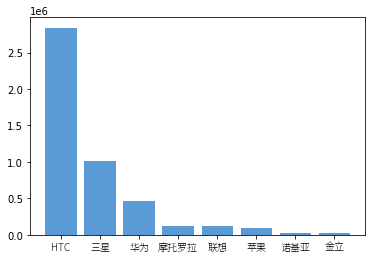

In [54]:
import matplotlib
from matplotlib import pyplot as plt

plt.figure()
sgb = result.sort_values(
    by = '月消费（元）',
    ascending = False
)
index = [1, 2, 3, 4, 5, 6, 7, 8]
plt.bar(
    index, 
    sgb['月消费（元）'],
    color = mainColor
)

plt.xticks(index, result.手机品牌, fontproperties=font)

([<matplotlib.axis.YTick at 0x122509bd0>,
 [Text(0, 1, '华为'),
  Text(0, 2, '金立'),
  Text(0, 3, '联想'),
  Text(0, 4, '摩托罗拉'),
  Text(0, 5, '苹果'),
  Text(0, 6, 'HTC'),
  Text(0, 7, '三星'),
  Text(0, 8, '诺基亚')])

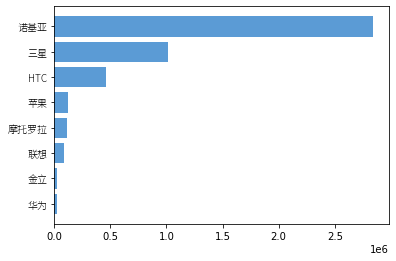

In [55]:
sgb = result.sort_values(
    by = '月消费（元）',
    ascending = True
)
plt.barh(
    index,
    sgb['月消费（元）'],
    color = mainColor
)
plt.yticks(index, sgb.手机品牌, fontproperties=font)